# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Doe water in de maatcilinder
2. Meet de begin temperatuur van water en noteer die
3. Bereken de massa van het water met weegschaal
4. Doe de weerstand eerst in het water en maak het vast aan de voedingsbron.
5. Roer het water.
6. Meet elke 20 seconde de U, I en tijd en noteer deze
7. Meet de eind temperatuur



## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


Soortelijke warmte van water: 6.23 ± 0.17 J/g°C


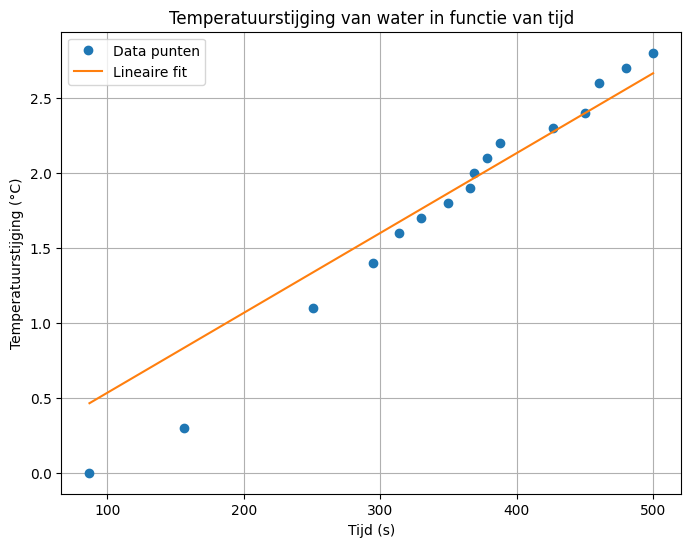

In [11]:
# Hier de data en de analyse 
maatbeker_pil=191.7 #g
maatbeker_met_water=472.2 #g
water_massa=maatbeker_met_water-maatbeker_pil #g
T_water_voor= 19.9 # graden C
T_na=23.6 # graden C
#delta_T=T_na-T_water_voor

Temps=np.array([20.8,21.1,21.9,22.2,22.4,22.5,22.6,22.7,22.8,22.9,23.0,23.1,23.2,23.4,23.5,23.6]) # graden C
U=9.5 # Volt
I=0.98 # Ampere
time=np.array([87,156,251,295,314,330,350,366,369,378,388,427,450,460,480,500]) # seconden
T0=Temps[0]
delta_T = Temps - T0
P=U*I #W
Q=P*time

def linfunc(t,a):
    return a*t

var, cov = curve_fit(linfunc, time, delta_T)
slope = var[0]
slope_err = np.sqrt(np.diag(cov))[0]

c= P/(water_massa* slope) # J/g°C
#Onzekerheid in c
dc= c * (slope_err/slope)

print(f"Soortelijke warmte van water: {c:.2f} ± {dc:.2f} J/g°C")

# Plotten van de data en de fit
plt.figure(figsize=(8,6))
plt.plot(time, delta_T, 'o', label='Data punten')
plt.plot(time, linfunc(time, *var), '-', label='Lineaire fit')
plt.xlabel('Tijd (s)')
plt.ylabel('Temperatuurstijging (°C)')
plt.title('Temperatuurstijging van water in functie van tijd')
plt.legend()
plt.grid()
plt.show()



In [12]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)



# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.